# Function to automatic merge and fill missing values
This quest is following the quest "Pandas merge and fill missing values"

## Create the function
You have to create a function which take 2 arguments :
- argument 1 : DataFrame main
- argument 2 : DataFrame opinion
Your function will return a new DataFrame which is the left merge of the both DataFrames, and which has no missing values (so your function has to fill them).

In [1]:
import pandas as pd 

link_main = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_main_2018.csv"
link_opinion = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_opinion_2018.csv"
df_main = pd.read_csv(link_main)
df_opinion = pd.read_csv(link_opinion)
print(df_main.head())
print(df_opinion.head())
print(df_main.info())
print(df_opinion.info())

         DATE  MAX_TEMPERATURE_C  ...  DEWPOINT_MAX_C  WINDTEMP_MAX_C
0  2018-01-01                 12  ...               8               7
1  2018-01-02                 13  ...              12               6
2  2018-01-03                 15  ...              13               7
3  2018-01-04                 14  ...              12              10
4  2018-01-05                 12  ...              10               7

[5 rows x 15 columns]
         date  WEATHER_CODE_EVENING  TOTAL_SNOW_MM  UV_INDEX  SUNHOUR OPINION
0  2018-01-01                   113              0         3      5.1     bad
1  2018-03-12                   119              0         2      8.8     bad
2  2018-03-09                   116              0         3     10.2     bad
3  2018-10-07                   122              0         1      5.6     bad
4  2018-06-18                   119              0         1     12.9     bad
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (tot

In [3]:
# Andere Variante, nicht hart kodiert: 

def merge_and_fill2(DataFrameMain, DataFrameOpinion):
 
 NewDataFrame = pd.merge(df_main, df_opinion, how = 'left', left_on= 'DATE', right_on='date').drop(['date'], axis=1)
 NewDataFrame.fillna( method = 'bfill', inplace=True)
 return NewDataFrame


df= merge_and_fill2(DataFrameMain = df_main, DataFrameOpinion = df_opinion)
df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    365 non-null    object 
 1   MAX_TEMPERATURE_C       365 non-null    int64  
 2   MIN_TEMPERATURE_C       365 non-null    int64  
 3   WINDSPEED_MAX_KMH       365 non-null    int64  
 4   TEMPERATURE_MORNING_C   365 non-null    int64  
 5   TEMPERATURE_NOON_C      365 non-null    int64  
 6   TEMPERATURE_EVENING_C   365 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64  
 9   VISIBILITY_AVG_KM       365 non-null    float64
 10  PRESSURE_MAX_MB         365 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64
 12  HEATINDEX_MAX_C         365 non-null    int64  
 13  DEWPOINT_MAX_C          365 non-null    int64  
 14  WINDTEMP_MAX_C          365 non-null    in

## Execution with a loop
You will execute your function in a 9 rounds loop, once per year, and agregate this in a new big DataFrame with 24 columns and lots of rows.

In [4]:
# Each year between 2010 and 2018 (included) has 2 sources : weather_main_YYYY.csv and weather_opinion_YYYY.csv

import pandas as pd 

for year in range(2010, 2019):
 Main_link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_main_" + str(year) + ".csv"
 Opinion_link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_opinion_" + str(year) + ".csv"
 Main_df = pd.read_csv(Main_link)
 Opinion_df = pd.read_csv(Opinion_link)
 df_year = merge_and_fill(DataFrameMain = Main_df, DataFrameOpinion = Opinion_df)
 if year == 2010: 
   concat_df = df_year 

 concat_df = pd.concat([df_year,concat_df], ignore_index= True)
 

## Add 2019

In [5]:
link2019 = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"

df2019 = pd.read_csv(link2019)

df_all = pd.concat([concat_df,df2019], ignore_index= True)
 



# Draw a scatterplot
With Date on X-Axis and Max Temperature on Y-axis

The result must have 10 seasonality for the 10 summers/winters alternance.


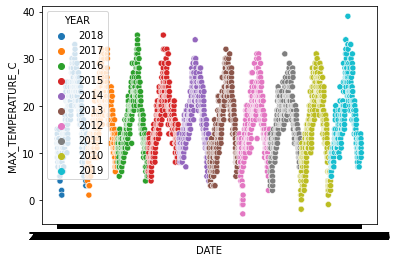

In [9]:
import seaborn as sns 

df_all['YEAR'] = df_all['DATE'].apply(lambda x: x[:4])


sns.scatterplot(data=df_all, x="DATE", y="MAX_TEMPERATURE_C", hue='YEAR' ) 

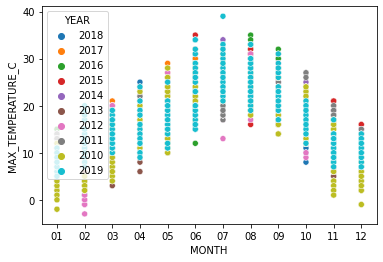

In [10]:
df_all['MONTH'] = df_all['DATE'].apply(lambda x: x[5:7])


sns.scatterplot(data=df_all, x="MONTH", y="MAX_TEMPERATURE_C", hue='YEAR' ) 